In [ ]:
'''
from rdkit import Chem
from rdkit.Chem import AllChem

# 定义反应物的 SMILES
reactant1_smiles = 'CCCCCCCCC(=O)OCCCCCC(=[C]=[N]C1CCCCC1)NCCN1CCCC1'  # 中间体
reactant1_smiles = 'CCCCCCCCC(=O)OCCCCCC(=C=NC1CCCCC1)NCCN1CCCC1'  # 中间体
                   
reactant2_smiles = 'CCCCCC(=O)O'  # 羧酸
water_smiles = 'O'  # 水

# 转换为分子对象
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)
water = Chem.MolFromSmiles(water_smiles)

# 检查是否解析成功
if None in [reactant1, reactant2, water]:
    print("❌ 有反应物解析失败，请检查 SMILES。")
else:
    print("✅ 所有反应物成功解析。")

# 定义修正的 Ugi 第三步反应 SMARTS
reaction_smarts = '[N:1]-[C:2]=[C:3]=[N:4].[C:5](=[O:6])[O;H].[O:7]>>[C:2](-[C:3](=[O:7])-[N:4])-[N:1]-[C:5](=[O:6]).[O]' #最终SMART
# 创建反应对象
reaction = AllChem.ReactionFromSmarts(reaction_smarts)
print("✅ 反应 SMARTS 构建成功")

# 运行反应
products = reaction.RunReactants((reactant1, reactant2, water))

# 输出结果
if not products:
    print("⚠️ 没有生成任何产物，请检查反应 SMARTS 是否与反应物匹配。")
else:
    for idx, product_set in enumerate(products):
        for product in product_set:
            product_smiles = Chem.MolToSmiles(product)
            print(f"[产物 {idx}] {product_smiles}")

'''

In [ ]:
'''
#True mol
mol13 = Chem.MolFromSmiles("CCCCCCCCC(=O)OCCCCCC(C(=O)NC1CCCCC1)N(CCN1CCCC1)C(=O)CCCCC",sanitize=True)
mol13
'''

In [ ]:
'''
#True mol
mol13 = Chem.MolFromSmiles("CCCCCCCCC(=O)OCCCCCC(C(=O)NC1CCCCC1)N(CCN1CCCC1)C(=O)CCCCC",sanitize=True)
mol13
#[产物 0] 
#[产物 0] 
'''

In [ ]:
import csv
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import os

# ============ 1. 定义原料列表 ============

amine_head_list = [
    "NCCN1CCCC1"
]

# 异腈
isocyanide_linker_list = [
    "[C-]#[N+]C1CCCCC1"
]

# 醛所在列表
Tail_1_list = [
    "CCCCCCCCC(=O)OCCCCCC=O"
    # 如果没有真正的 -CHO，这里可能匹配不到
]

# 羧酸
Tail_2_list = [
    "CCCCCC(=O)O"
]

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import random

amine_head_list = [
    "NCCN1CCCC1", 
    #"C1CCN(C1)CCN",
    #"NCCN1CCCCC1",         
    "CCC1CCCCN1CCCN" 
    
]

isocyanide_linker_list = [
    "CC(C)(C)OC(=O)C[N+]#[C-]", 
    #"CC(C)(C)[N+]#[C-]",
    #"[C-]#[N+]C1CCCCC1" ,
    "CCCC[N+]#[C-]"
]

Tail_1_list = [
    "CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC=O",
    #"CCCCCCCCC(=O)OCCCCCC=O",
    #"CCCCCCCCCCC(=O)OCCCCCC=O",
    #"CCCCCCCCCCCCC(=O)OCCCCCC=O",
    #"CCCCCCCCCCCCCCCC(=O)OCCCCCC=O",
    #"CCCCCCCCCCCCCCCCCC(=O)OCCCCCC=O",
    #"CCCCC/C=C\C/C=C\CCCCCCCC(=O)OCCCCCC=O",
    #"CCCCCCCC/C=C\CCCCCCCC(=O)OCCCCCC=O",
    "CCC=O"
]

Tail_2_list = [
    "CCCCCCCC/C=C\CCCCCCCC(=O)O",
    #"CCCCC/C=C\C/C=C\CCCCCCCC(=O)O",
    #"CCCCCCCCCCCCCCCC(=O)O",
    "CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=O)O"
]


In [23]:
def process_and_save_products(product_mols, step_name):
    """
    1) 去重 & 转SMILES
    2) 打印SMILES到控制台
    3) 输出到 CSV: f"{step_name}_products.csv"
    4) 在 Notebook 中显示网格图, 并保存到 f"{step_name}_products.png"
    5) 返回去重后的Mols
    """
    import csv
    from rdkit import Chem
    from rdkit.Chem import Draw
    from IPython.display import display

    if not product_mols:
        print(f"[{step_name}] 没有产物生成.")
        return []

    # 1) 去重并转成 SMILES
    unique_smiles = list(set(Chem.MolToSmiles(m, isomericSmiles=True) for m in product_mols))
    print(f"[{step_name}] 原产物数={len(product_mols)}, 去重后={len(unique_smiles)}")

    # 2) 在控制台打印 SMILES
    print(f"[{step_name}] 产物 SMILES 列表:")
    for smi in unique_smiles:
        print("  ", smi)

    # 3) 转回Mol
    unique_mols = [Chem.MolFromSmiles(s) for s in unique_smiles if s]

    # 4) 保存CSV
    csv_filename = f"{step_name}_products.csv"
    with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["编号", "SMILES"])
        for idx, smi in enumerate(unique_smiles, start=1):
            writer.writerow([idx, smi])
    print(f"[{step_name}] CSV已保存: {csv_filename}")

    # 5) Notebook显示网格图 & 保存PNG
    if unique_mols:
        # (A) Notebook显示
        img_for_notebook = Draw.MolsToGridImage(unique_mols, molsPerRow=4, subImgSize=(200,200))
        display(img_for_notebook)

        # (B) 保存PNG (使用 returnPNG=True 获取字节数据)
        png_filename = f"{step_name}_products.png"
        img_data = Draw.MolsToGridImage(unique_mols, molsPerRow=4, subImgSize=(200,200), returnPNG=True)
        #with open(png_filename, "wb") as f:
        #    f.write(img_data)
        #print(f"[{step_name}] 图片已保存: {png_filename}")
    #else:
    #    print(f"[{step_name}] 无法可视化(无有效分子).")

    return unique_mols


Step 1 (亚胺生成) 反应有效性: False

Step 1 产物(亚胺)数: 4
[step1_imine] 原产物数=4, 去重后=4
[step1_imine] 产物 SMILES 列表:
   CCC=NCCCN1CCCCC1CC
   CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC=NCCCN1CCCCC1CC
   CCC=NCCN1CCCC1
   CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC=NCCN1CCCC1
[step1_imine] CSV已保存: step1_imine_products.csv


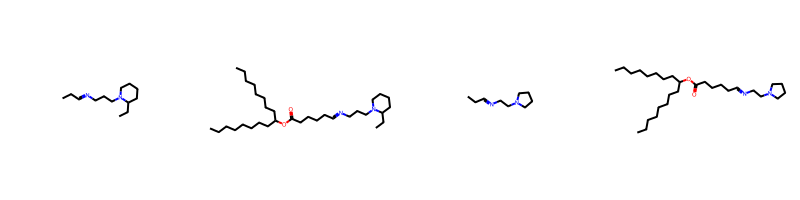

In [24]:

# ============ 2. 定义三步反应 SMARTS ============

# Step 1: 只匹配 -NH2 与 -CHO => 生成亚胺
# 原本的两步反应中第一步保留不变
#imine_reaction_smarts = "[CX3:1](=O)[CX4:2].[NH2:3]>>[CX3:1](=[N:3])[CX4:2]"
imine_reaction_smarts = "[CX3H1:1](=O)[CX4:2].[NH2:3]>>[CX3H1:1](=[N:3])[CX4:2]"
#imine_reaction_smarts = "[NH2:1][#6:2].[#6:3]=[O:4]>>[#6:2]=[N:1][#6:3]"


rxn_imine = AllChem.ReactionFromSmarts(imine_reaction_smarts)
print("Step 1 (亚胺生成) 反应有效性:", rxn_imine.IsInitialized())  # True
step1_products = []
for amine_smiles in amine_head_list:
    mol_amine = Chem.MolFromSmiles(amine_smiles)
    if not mol_amine:
        continue

    for aldehyde_smiles in Tail_1_list:
        mol_aldehyde = Chem.MolFromSmiles(aldehyde_smiles)
        if not mol_aldehyde:
            continue

        # 运行 Step 1
        ps1 = rxn_imine.RunReactants((mol_aldehyde, mol_amine))
        if not ps1:
            continue

        for ptuple in ps1:
            for pmol in ptuple:
                try:
                    Chem.SanitizeMol(pmol)
                    step1_products.append(pmol)
                except:
                    pass

print(f"\nStep 1 产物(亚胺)数: {len(step1_products)}")
step1_unique_mols = process_and_save_products(step1_products, "step1_imine")




[检查点] 已创建反应对象 rxn_2
[检查点] 正在处理第 0 个亚胺反应物：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC=NCCN1CCCC1
[检查点] 正在处理第 0 个异腈：CC(C)(C)OC(=O)C[N+]#[C-]
[检查点] 产物已添加到列表（去电荷）：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCC(=O)OC(C)(C)C)NCCN1CCCC1
[检查点] 正在处理第 1 个异腈：CCCC[N+]#[C-]
[检查点] 产物已添加到列表（去电荷）：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCCCC)NCCN1CCCC1
[检查点] 正在处理第 1 个亚胺反应物：CCC=NCCN1CCCC1
[检查点] 正在处理第 0 个异腈：CC(C)(C)OC(=O)C[N+]#[C-]
[检查点] 产物已添加到列表（去电荷）：CCC(=C=NCC(=O)OC(C)(C)C)NCCN1CCCC1
[检查点] 正在处理第 1 个异腈：CCCC[N+]#[C-]
[检查点] 产物已添加到列表（去电荷）：CCCCN=C=C(CC)NCCN1CCCC1
[检查点] 正在处理第 2 个亚胺反应物：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC=NCCCN1CCCCC1CC
[检查点] 正在处理第 0 个异腈：CC(C)(C)OC(=O)C[N+]#[C-]
[检查点] 产物已添加到列表（去电荷）：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCC(=O)OC(C)(C)C)NCCCN1CCCCC1CC
[检查点] 正在处理第 1 个异腈：CCCC[N+]#[C-]
[检查点] 产物已添加到列表（去电荷）：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCCCC)NCCCN1CCCCC1CC
[检查点] 正在处理第 3 个亚胺反应物：CCC=NCCCN1CCCCC1CC
[检查点] 正在处理第 0 个异腈：CC(C)(C)OC(=O)C[N+]#[C-]
[检查点] 产物已添加到列表（去电荷）：CCC(=C=NCC(=O)OC(C)(C)C)NCCCN1CCCCC1CC
[检查点] 正在处理第 1 个异腈：CCCC[N+]#[C-]
[检

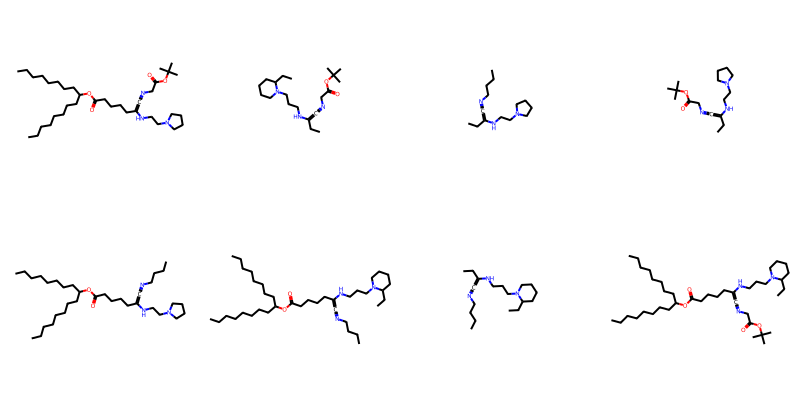

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem

# 修正后的反应 SMARTS（确保无电荷版本）
rxn_2_smarts = "[C:1]=[N:2].[C-:3]#[N+:4]>>[N:2]-[C:1]=[C:3]=[N:4]"

rxn_2 = AllChem.ReactionFromSmarts(rxn_2_smarts)
print("[检查点] 已创建反应对象 rxn_2")

step2_products = []
for idx, mol_imine in enumerate(step1_products):
    if mol_imine is None:
        print(f"[警告] 第 {idx} 个亚胺反应物为空，跳过。")
        continue

    imine_smiles = Chem.MolToSmiles(mol_imine)
    print(f"[检查点] 正在处理第 {idx} 个亚胺反应物：{imine_smiles}")

    for iso_idx, isocyanide_smiles in enumerate(isocyanide_linker_list):
        mol_iso = Chem.MolFromSmiles(isocyanide_smiles)
        if not mol_iso:
            print(f"[警告] 异腈 SMILES '{isocyanide_smiles}' 解析失败，跳过。")
            continue

        print(f"[检查点] 正在处理第 {iso_idx} 个异腈：{isocyanide_smiles}")

        # 运行反应
        ps2 = rxn_2.RunReactants((mol_imine, mol_iso))
        if not ps2:
            print("[提示] 反应未生成产物，继续下一个组合。")
            continue

        for ptuple in ps2:
            for pmol in ptuple:
                # **去除电荷**
                for atom in pmol.GetAtoms():
                    if atom.GetFormalCharge() != 0:
                        atom.SetFormalCharge(0)  # 设为中性

                # 重新标准化分子结构
                Chem.SanitizeMol(pmol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_PROPERTIES)

                product_smiles = Chem.MolToSmiles(pmol, isomericSmiles=True)
                step2_products.append(pmol)
                print(f"[检查点] 产物已添加到列表（去电荷）：{product_smiles}")

print(f"\nStep 2 产物数: {len(step2_products)}")
if step2_products:
    step2_unique_mols = process_and_save_products(step2_products, "step2_intermediate")
else:
    print("[提示] 没有生成任何产物。")



[检查点] ✅ 已创建第三步反应对象 rxn_3

[检查点] 第一步反应产物数量: 8

[检查点] 正在处理第 1 个中间体：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCC(=O)OC(C)(C)C)NCCN1CCCC1
[检查点] 正在处理第 1 个羧酸：CCCCCCCC/C=C\CCCCCCCC(=O)O
[检查点] 羧酸已解析为分子：CCCCCCCC/C=C\CCCCCCCC(=O)O
[检查点] ⚙️ 正在尝试反应：[CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCC(=O)OC(C)(C)C)NCCN1CCCC1] + [CCCCCCCC/C=C\CCCCCCCC(=O)O]
[检查点] 🎉 成功生成 1 个产物组合！
[检查点] 第 1-1 个产物 SMILES：CCCCCCCC/C=C\CCCCCCCC(=O)N(CCN1CCCC1)C(CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)C(=O)NCC(=O)OC(C)(C)C
[检查点] 第 1-2 个产物 SMILES：O
[检查点] 正在处理第 2 个羧酸：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=O)O
[检查点] 羧酸已解析为分子：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=O)O
[检查点] ⚙️ 正在尝试反应：[CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCC(=O)OC(C)(C)C)NCCN1CCCC1] + [CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=O)O]
[检查点] 🎉 成功生成 1 个产物组合！
[检查点] 第 1-1 个产物 SMILES：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=O)N(CCN1CCCC1)C(CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)C(=O)NCC(=O)OC(C)(C)C
[检查点] 第 1-2 个产物 SMILES：O

[检查点] 正在处理第 2 个中间体：CCCCCCCCC(CCCCCCCC)OC(=O)CCCCC(=C=NCCCC)NCCN1CCCC1
[检查点] 正在处理第 1 个羧酸：CCCCCCCC/C=C\CCCCCCCC(=O)O
[检

[16:25:19] product 1 has no mapped atoms.


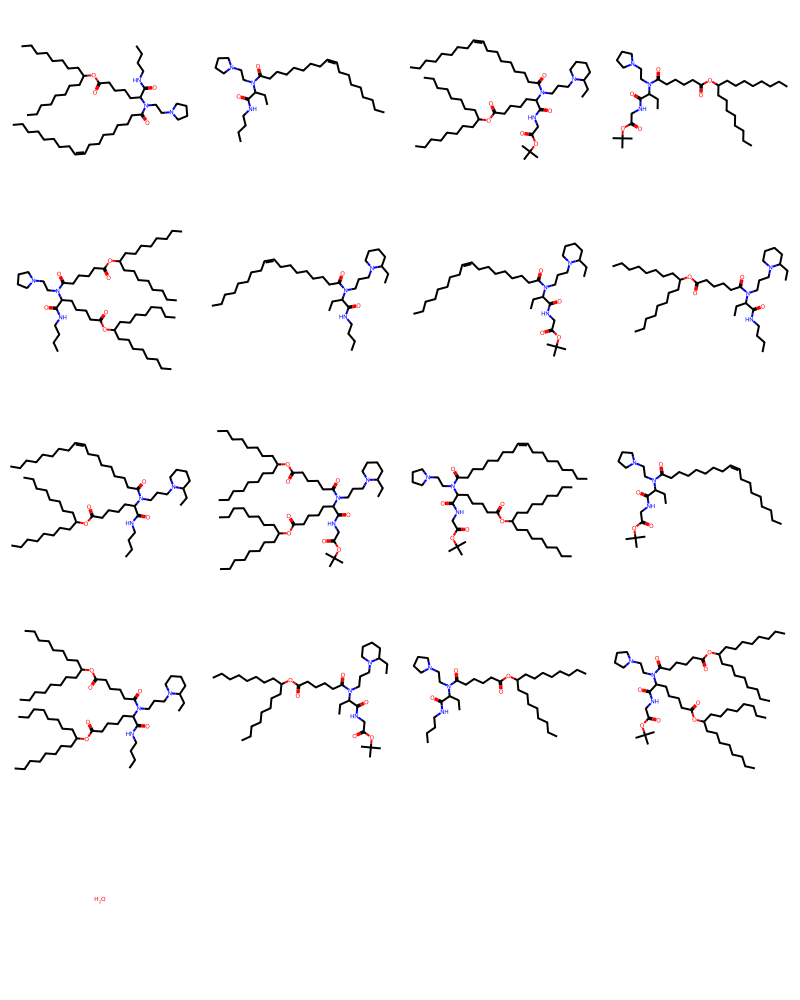

In [26]:
# === 第三步反应 SMARTS，进行 Ugi 最终酰胺化、Mumm 重排 ===
#rxn_3_smarts = "[N:1]-[C:2]=[C:3]=[N:4].[C:5](=O)[O;H]>>[N:1]-[C:2](-[C:3](=O)-[N:4])-[C:5](=O).O"
rxn_3_smarts = '[N:1]-[C:2]=[C:3]=[N:4].[C:5](=[O:6])[O;H].[O:7]>>[C:2](-[C:3](=[O:7])-[N:4])-[N:1]-[C:5](=[O:6]).[O]' #最终SMART
rxn_3 = AllChem.ReactionFromSmarts(rxn_3_smarts)
print("\n[检查点] ✅ 已创建第三步反应对象 rxn_3\n")
water_smiles = 'O'  # 水
water = Chem.MolFromSmiles(water_smiles)
# === 执行反应 ===
step3_products = []

# 检查 step2 产物列表
print(f"[检查点] 第一步反应产物数量: {len(step2_products)}")
if len(step2_products) == 0:
    print("[❗错误] step2_products 为空，无法继续第三步反应！")

# 遍历中间体和羧酸
for idx, intermediate in enumerate(step2_products):
    interm_smiles = Chem.MolToSmiles(intermediate, isomericSmiles=True)
    print(f"\n[检查点] 正在处理第 {idx + 1} 个中间体：{interm_smiles}")

    # 确认是否能正确解析为分子
    if not intermediate:
        print(f"[❗错误] 中间体 {idx + 1} 无法解析为分子对象，跳过！")
        continue

    # 遍历羧酸
    for acid_idx, acid_smiles in enumerate(Tail_2_list):
        print(f"[检查点] 正在处理第 {acid_idx + 1} 个羧酸：{acid_smiles}")

        mol_acid = Chem.MolFromSmiles(acid_smiles)
        if mol_acid is None:
            print(f"[⚠️ 警告] 羧酸 SMILES '{acid_smiles}' 无法解析，跳过。")
            continue

        # 再次输出反应物SMILES（确认最终参与反应的物质）
        acid_final_smiles = Chem.MolToSmiles(mol_acid, isomericSmiles=True)
        print(f"[检查点] 羧酸已解析为分子：{acid_final_smiles}")

        # ========== 反应开始 ==========
        print(f"[检查点] ⚙️ 正在尝试反应：[{interm_smiles}] + [{acid_final_smiles}]")
        ps3 = rxn_3.RunReactants((intermediate, mol_acid,water))

        # 反应产物检查
        if not ps3:
            print("[提示] ❌ 当前组合未生成任何产物。")
            continue

        print(f"[检查点] 🎉 成功生成 {len(ps3)} 个产物组合！")

        for p_idx, ptuple in enumerate(ps3):
            for pmol_idx, pmol in enumerate(ptuple):
                try:
                    product_smiles = Chem.MolToSmiles(pmol, isomericSmiles=True)
                    print(f"[检查点] 第 {p_idx + 1}-{pmol_idx + 1} 个产物 SMILES：{product_smiles}")
                    step3_products.append(pmol)
                except Exception as e:
                    print(f"[❗错误] 第 {p_idx + 1}-{pmol_idx + 1} 个产物转换 SMILES 失败，原因：{e}")

# === 输出最终结果 ===
print(f"\nStep 3 最终产物总数: {len(step3_products)}")
if step3_products:
    step3_unique_mols = process_and_save_products(step3_products, "step3_final_products")
else:
    print("[❗提示] 没有生成任何产物，请检查 SMARTS 或反应物是否匹配！")

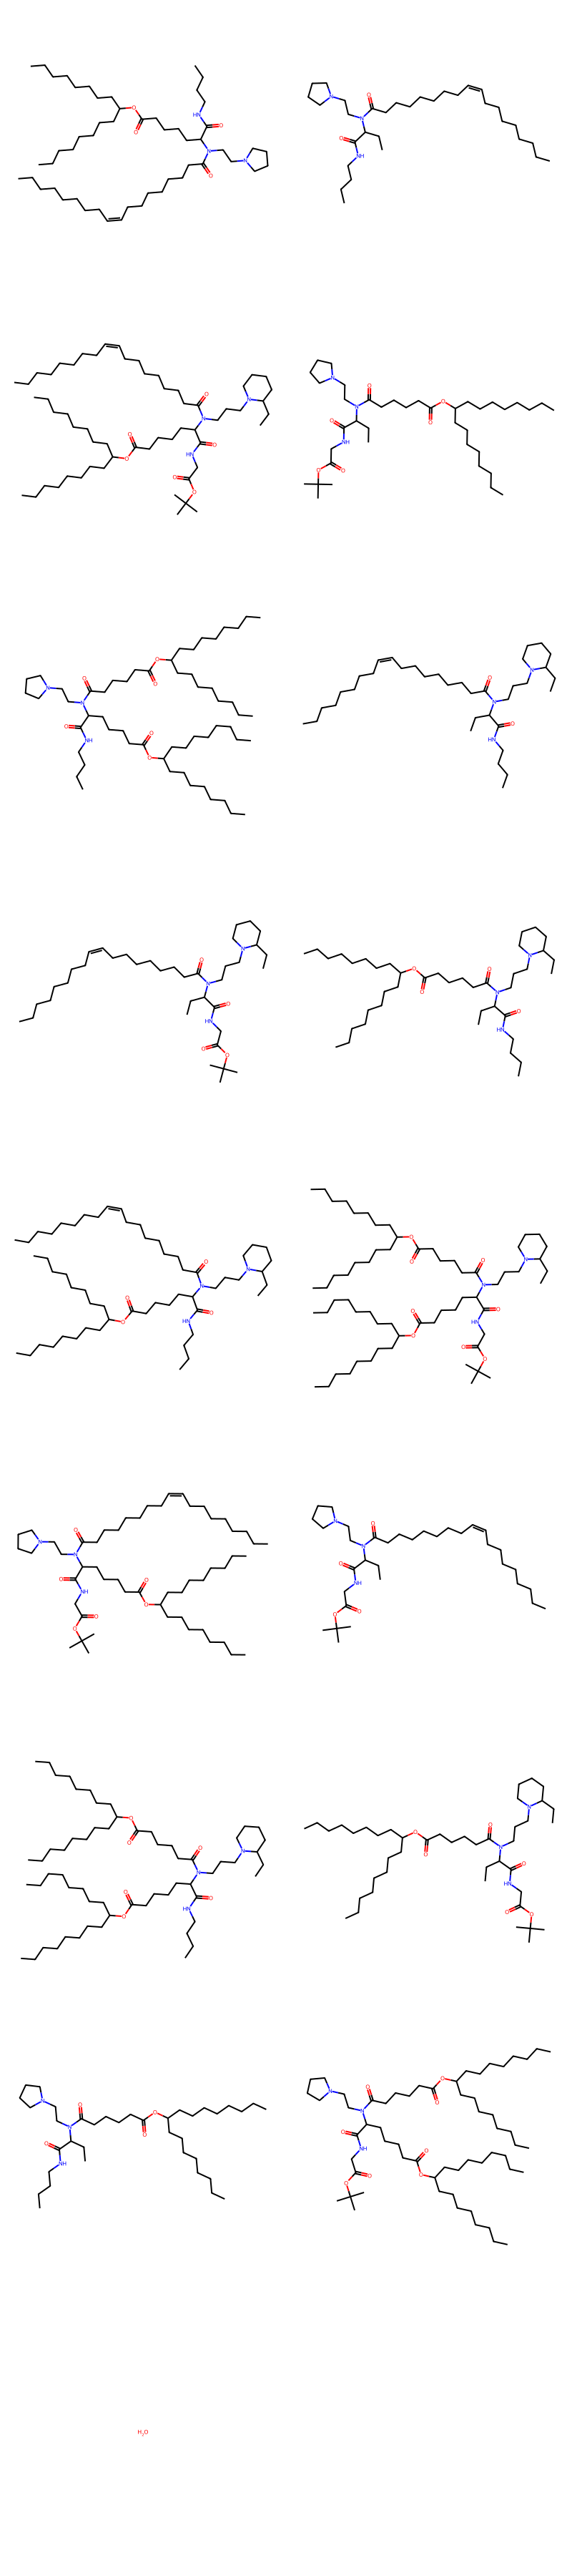

In [27]:
img = Draw.MolsToGridImage(step3_unique_mols, molsPerRow=2, subImgSize=(400, 400))
display(img)

In [38]:
import os
os.makedirs("product_images_4A_1", exist_ok=True)

for i, mol in enumerate(step3_unique_mols, start=1):
    if mol is None:
        continue
    # 为每个产物生成独立文件名
    filename = f"product_images_4A_1/product_{i}.png"
    # 将分子保存为 PNG 图片
    Draw.MolToFile(mol, filename, size=(600,600))
    print(f"已保存: {filename}")

已保存: product_images_4A_1/product_1.png
已保存: product_images_4A_1/product_2.png
已保存: product_images_4A_1/product_3.png
已保存: product_images_4A_1/product_4.png
已保存: product_images_4A_1/product_5.png
已保存: product_images_4A_1/product_6.png
已保存: product_images_4A_1/product_7.png
已保存: product_images_4A_1/product_8.png
已保存: product_images_4A_1/product_9.png
已保存: product_images_4A_1/product_10.png
已保存: product_images_4A_1/product_11.png
已保存: product_images_4A_1/product_12.png
已保存: product_images_4A_1/product_13.png
已保存: product_images_4A_1/product_14.png
已保存: product_images_4A_1/product_15.png
已保存: product_images_4A_1/product_16.png
已保存: product_images_4A_1/product_17.png


In [39]:
!zip -r product_images_4A_1.zip product_images_4A_1/

updating: product_images_4A_1/ (stored 0%)
  adding: product_images_4A_1/product_1.png (deflated 10%)
  adding: product_images_4A_1/product_2.png (deflated 13%)
  adding: product_images_4A_1/product_3.png (deflated 8%)
  adding: product_images_4A_1/product_4.png (deflated 12%)
  adding: product_images_4A_1/product_5.png (deflated 8%)
  adding: product_images_4A_1/product_6.png (deflated 12%)
  adding: product_images_4A_1/product_7.png (deflated 10%)
  adding: product_images_4A_1/product_8.png (deflated 11%)
  adding: product_images_4A_1/product_9.png (deflated 9%)
  adding: product_images_4A_1/product_10.png (deflated 7%)
  adding: product_images_4A_1/product_11.png (deflated 9%)
  adding: product_images_4A_1/product_12.png (deflated 10%)
  adding: product_images_4A_1/product_13.png (deflated 8%)
  adding: product_images_4A_1/product_14.png (deflated 9%)
  adding: product_images_4A_1/product_15.png (deflated 12%)
  adding: product_images_4A_1/product_16.png (deflated 7%)
  adding: prod

In [40]:
ls *zip

product_images_4A_1.zip


In [35]:
ls *zip

product_images_4A_1.zip


In [36]:
ll *zip

-rw-rw-r-- 1 wangquan 190  3月 10 16:38 product_images_4A_1.zip


In [37]:
pwd

'/mnt/data/share/wq/soft/AI_LNP'